# AE332: Modelling and Analysis Lab
## Session 1 (Part 2) : To solve Laplace and diffusion equations using the finite difference scheme
---
**Name:** Gaurav Gupta

**SC-Code:** SC21B026

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: 2D Diffusion Problem

In [2]:
alpha = 11.234e-5
L = 0.3
W = 0.4
IMAX = 31
JMAX = 41
T1, T2, T3, T4 = 40, 0, 10, 0
CONSS = 0.01
tf = 500 
dx = L/(IMAX-1)
dy = W/(JMAX-1)
X = np.arange(0, L+dx, dx)
Y = np.arange(0, W+dy, dy)
U0 = np.zeros((IMAX, JMAX))
U0[0, 0], U0[0, JMAX-1], U0[IMAX-1, 0], U0[IMAX-1,JMAX-1] = 0.5*(T1 + T2), 0.5*(T3 + T2), 0.5*(T1 + T4), 0.5*(T3 + T4) 
U0[0,1:JMAX-1] = T2
U0[IMAX-1,1:JMAX-1] = T4
U0[1:IMAX-1, 0] = T1
U0[1:IMAX-1, JMAX-1] = T3

In [3]:
def FTCS_2D(U0, dx, dy, dt):
    t = np.arange(0, tf+dt, dt)
    U = np.zeros((IMAX, JMAX, np.size(t)))
    U[:,:,0] = U0
    U[0, 0, :], U[0, JMAX-1, :], U[IMAX-1, 0, :], U[IMAX-1,JMAX-1, :] = 0.5*(T1 + T2), 0.5*(T3 + T2), 0.5*(T1 + T4), 0.5*(T3 + T4) 
    U[0,1:JMAX-1, :] = T2
    U[IMAX-1,1:JMAX-1, :] = T4
    U[1:IMAX-1, 0, :] = T1
    U[1:IMAX-1, JMAX-1, :] = T3
    for n in range(0, t.size-1):
        for i in range(1, IMAX-1):
            for j in range(1, JMAX-1):
                Z = (U[i+1,j,n] - 2*U[i,j,n] + U[i-1,j,n])/dx/dx + (U[i,j+1,n] - 2*U[i,j,n] + U[i,j-1,n])/dy/dy
                U[i,j,n+1] = U[i,j,n] + alpha*dt*Z
    return t, U

### dt = 1 s

In [4]:
dt = 1
t, U = FTCS_2D(U0, dx, dy, dt)

C:\Users\gaura\AppData\Local\Temp\ipykernel_14964\1344543936.py:13: RuntimeWarning: overflow encountered in scalar add
  Z = (U[i+1,j,n] - 2*U[i,j,n] + U[i-1,j,n])/dx/dx + (U[i,j+1,n] - 2*U[i,j,n] + U[i,j-1,n])/dy/dy
C:\Users\gaura\AppData\Local\Temp\ipykernel_14964\1344543936.py:13: RuntimeWarning: overflow encountered in scalar divide
  Z = (U[i+1,j,n] - 2*U[i,j,n] + U[i-1,j,n])/dx/dx + (U[i,j+1,n] - 2*U[i,j,n] + U[i,j-1,n])/dy/dy
C:\Users\gaura\AppData\Local\Temp\ipykernel_14964\1344543936.py:14: RuntimeWarning: invalid value encountered in scalar add
  U[i,j,n+1] = U[i,j,n] + alpha*dt*Z


In [5]:
idxsteady = 0
for n in range(100,t.size-1):
    error = np.sum(U[:,:,n+1]-U[:,:,n])
    if error<0.01:
        idxsteady=n
        break

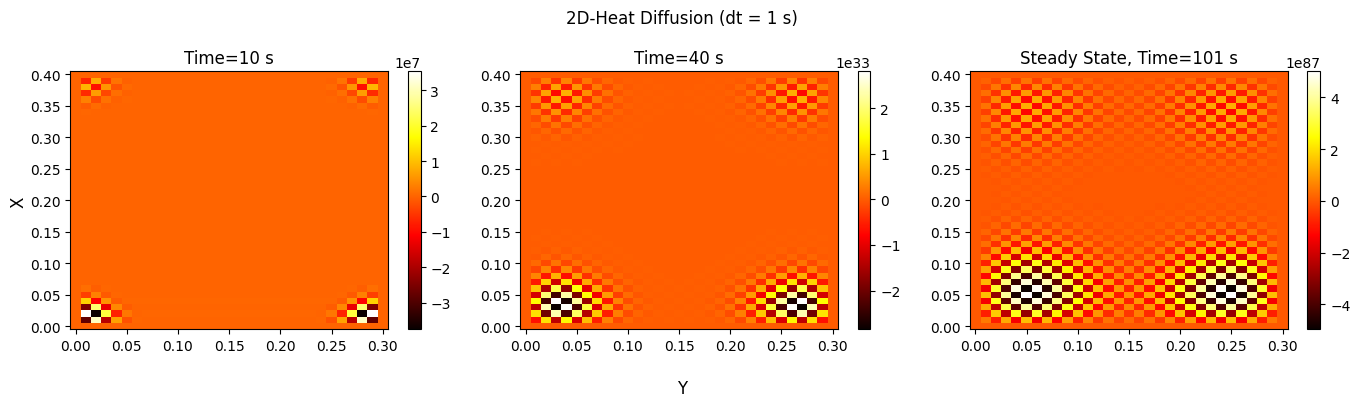

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
idx = np.where(t==10)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idx[0][0]]), cmap='hot')
plt.title("Time={} s".format(10))
plt.colorbar()
plt.subplot(1,3,2)
idx = np.where(t==40)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idx[0][0]]), cmap='hot')
plt.title("Time={} s".format(40))
plt.colorbar()
plt.subplot(1,3,3)
idx = np.where(t==100)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idxsteady]), cmap='hot')
plt.title("Steady State, Time={} s".format(t[idxsteady]))
plt.colorbar()
plt.suptitle("2D-Heat Diffusion (dt = {} s)".format(dt))
plt.gcf().supxlabel('Y')
plt.gcf().supylabel('X')
plt.tight_layout()

For timestep 1s, the stability crtieria is not satisfied for the given dx and dy. Thus, the solution diverges and we have the above plots.

### dt = 0.2s

In [7]:
dt = 0.2
t, U = FTCS_2D(U0, dx, dy, dt)

In [8]:
idxsteady = 0
for n in range(100,t.size-1):
    error = np.sum(U[:,:,n+1]-U[:,:,n])
    if error<0.01:
        idxsteady=n
        break

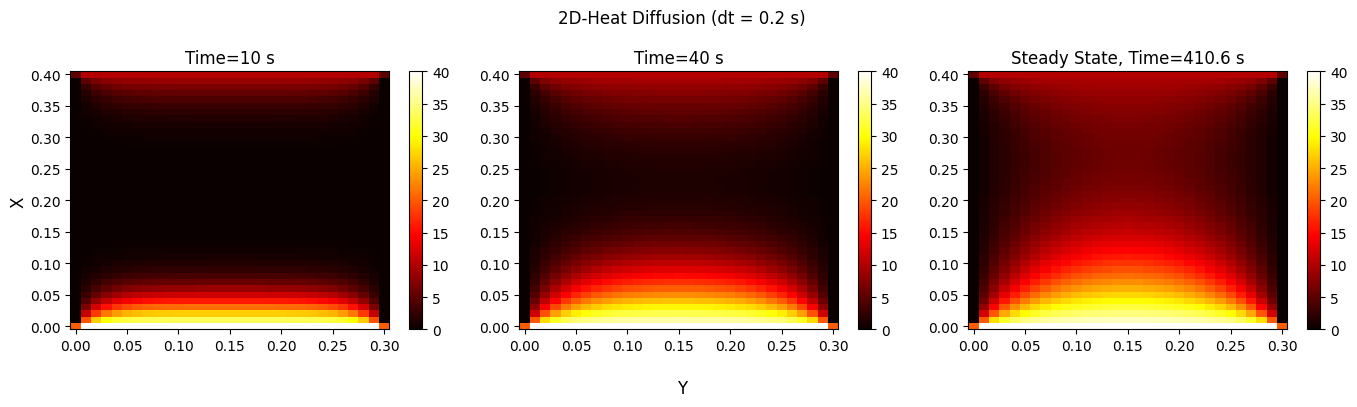

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
idx = np.where(t==10)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idx[0][0]]), cmap='hot')
plt.title("Time={} s".format(10))
plt.colorbar()
plt.subplot(1,3,2)
idx = np.where(t==40)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idx[0][0]]), cmap='hot')
plt.title("Time={} s".format(40))
plt.colorbar()
plt.subplot(1,3,3)
idx = np.where(t==100)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idxsteady]), cmap='hot')
plt.title("Steady State, Time={} s".format(t[idxsteady]))
plt.colorbar()
plt.suptitle("2D-Heat Diffusion (dt = {} s)".format(dt))
plt.gcf().supxlabel('Y')
plt.gcf().supylabel('X')
plt.tight_layout()

### Comparision with Analytical Steady State Solution

In [10]:
SSSol = np.zeros((IMAX, JMAX))
for x in range(IMAX):
    for y in range(JMAX):
        sum = 0
        for n in range(1, 51):
            ln = np.pi * n / L
            A = 40 * np.sinh(ln*(W-Y[y]))
            B = 10 * np.sinh(ln*Y[y])
            sum += 2 * (A + B) * (1-(-1)**n) * np.sin(ln*X[x]) / n / np.pi / np.sinh(ln*W) 
        SSSol[x, y] = sum

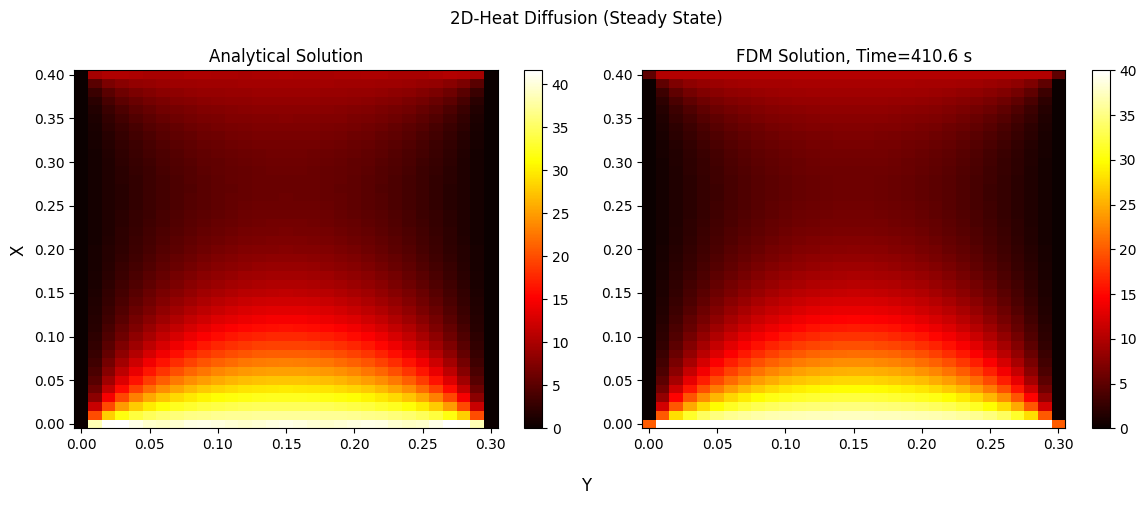

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pcolormesh(X, Y, np.transpose(SSSol), cmap='hot')
plt.colorbar()
plt.title('Analytical Solution')
plt.subplot(1,2,2)
plt.pcolormesh(X, Y, np.transpose(U[:,:, idxsteady]), cmap='hot')
plt.title("FDM Solution, Time={} s".format(t[idxsteady]))
plt.colorbar()
plt.suptitle("2D-Heat Diffusion (Steady State)".format(dt))
plt.gcf().supxlabel('Y')
plt.gcf().supylabel('X')
plt.tight_layout()

### Transient Solution for 2D Diffusion

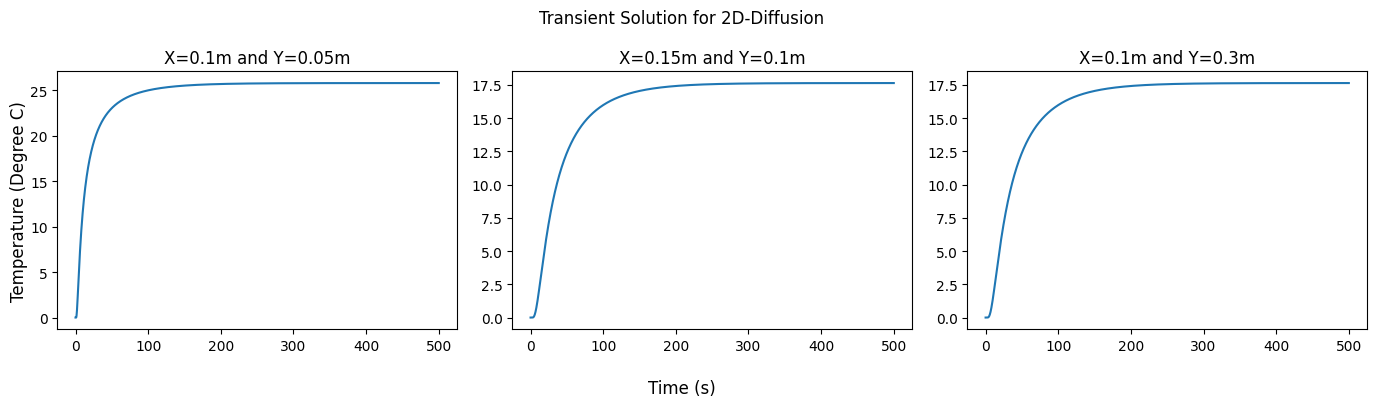

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
idx = np.where(X==0.1)
idy = np.where(Y==0.05)
plt.plot(t, U[idx[0][0],idy[0][0],:])
plt.title("X={}m and Y={}m".format(0.1, 0.05))

plt.subplot(1,3,2)
idx = np.where(X==0.15)
idy = np.where(Y==0.1)
plt.plot(t, U[idx[0][0],idy[0][0],:])
plt.title("X={}m and Y={}m".format(0.15, 0.1))

plt.subplot(1,3,3)
idx = np.where(X==0.15)
idy = np.where(Y==0.1)
plt.plot(t, U[idx[0][0],idy[0][0],:])
plt.title("X={}m and Y={}m".format(0.1, 0.3))

plt.suptitle("Transient Solution for 2D-Diffusion")
plt.gcf().supxlabel('Time (s)')
plt.gcf().supylabel('Temperature (Degree C)')
plt.tight_layout()

### Heat Transfer Distribution from (x,y)=(0,0) and (x,y)=(0,W)

Text(0, 0.5, 'Temperature (Degree C)')

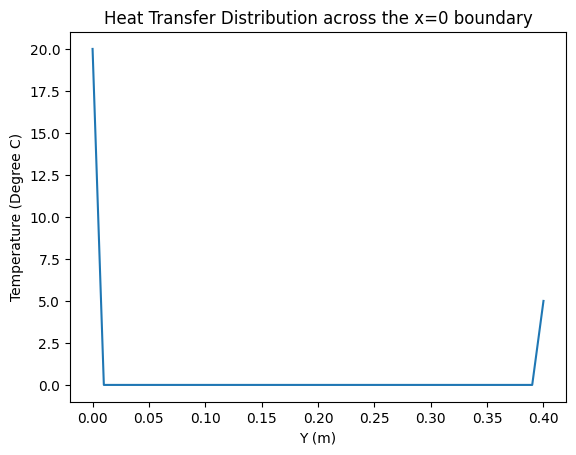

In [13]:
plt.plot(Y, U[0,:, idxsteady])
plt.title("Heat Transfer Distribution across the x=0 boundary")
plt.xlabel("Y (m)")
plt.ylabel("Temperature (Degree C)")

## Problem 2: Laplace Equation

In [14]:
dx=0.2
dy=0.2
ErrorMax = 0.01
L=5
X = np.arange(0,L+dx,dx)
Y = np.arange(0,L+dx,dx)
x, y = np.meshgrid(X, Y)
IMAX, JMAX = X.size, Y.size
U0 = np.zeros((IMAX, JMAX))
U0[7:,0]=100
U0[IMAX-1,0:15]=100

In [15]:
def PointJacobi(U0):
    phi = np.zeros((IMAX, JMAX, 2))
    phi[:,:,0] = U0
    phi[6:,0, :]=100
    phi[IMAX-1,0:np.where(X==3)[0][0], :]=100
    U = np.zeros((IMAX, JMAX, 2))
    V = np.zeros((IMAX, JMAX, 2))
    while True:
        n=0
        for j in range(1, JMAX-1):
            for i in range(1, IMAX-1):
                Z = (phi[i+1,j,n] - 4*phi[i,j,n] + phi[i-1,j,n] + phi[i,j+1,n] + phi[i,j-1,n])
                phi[i,j,n+1] = phi[i,j,n] + 0.25*Z
                V[i,j,n+1] = (phi[i,j,n+1]-phi[i-1,j,n+1])/dx
                U[i,j,n+1] = -(phi[i,j,n+1]-phi[i,j-1,n+1])/dy
        error = np.sum(phi[:,:,n+1]-phi[:,:,n])
        if error<0.01:
            return phi[:,:,n+1], U[:,:,n+1], V[:,:,n+1] 
        phi[:,:,n]=phi[:,:,n+1]

In [16]:
Sol, U, V = PointJacobi(U0)
Sol, U, V = np.transpose(Sol), np.transpose(U), np.transpose(V)

Text(0.5, 1.0, 'Solution of Laplace Equation using Point-Jacobi Method')

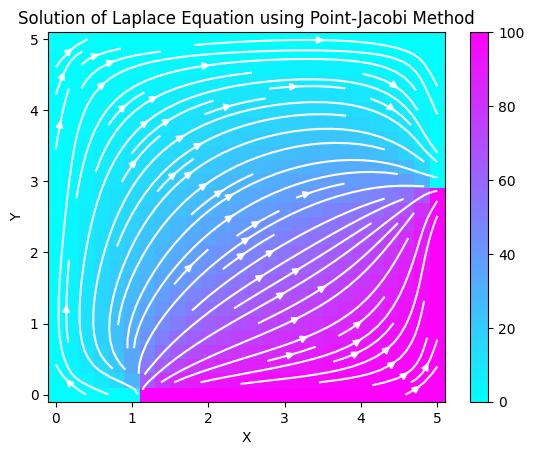

In [18]:
plt.pcolormesh(X, Y, Sol, cmap='cool')
plt.colorbar()
plt.streamplot(x,y,U,V, color='w')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Solution of Laplace Equation using Point-Jacobi Method")